# Exploratory Data Analysis Googleplaystore

## Dataset Googleplaystore

## Importing Library & Dataset

In [1]:
# Importing library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker
import datetime as dt
import pandas as pd

import scipy 
from scipy.stats.stats import pearsonr

import plotly
# connected=True untuk memastikan versi plotyly uptodate
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Importing data
dfGapps = pd.read_csv('dataset/googleplaystore.csv')

## Mengidentifikasi Atribut Dari Dataset GooglePlaystore

Dataset GooglePlaystore memiliki atribut seperti berikut :

In [2]:
dfGapps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [3]:
# Total baris dan kolom dalam Dataset
dfGapps.shape

(10841, 13)

Dataset GooglePlaystore memiliki dimensi 10841 baris x 13 kolom

In [4]:
# Menampilkan dataset
dfGapps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Mencari nilai unik dari Dataset

Dalam Dataset GooglePlaystore terdapat nilai-nilai unik sebagai gambaran terhadap keseluruhan isi data dari tiap kolom berikut : 
1. Apps
2. Category
3. Rating
4. Reviews
5. Size
6. Installs
7. Type
8. Price
9. Content Rating
10. Genres
11. Current Ver
12. Android Ver

### 1. App

In [5]:
# nilai unik dari kolom App
dfGapps['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

### 2. Category

In [6]:
# nilai unik dari kolom Category
dfGapps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

### 3. Rating

In [7]:
# nilai unik dari kolom Rating
dfGapps['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

### 4. Reviews

In [8]:
# nilai unik dari kolom Reviews
dfGapps['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

### 5. Size

In [9]:
# nilai unik dari kolom Size
dfGapps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### 6. Installs

In [10]:
# nilai unik dari kolom Installs
dfGapps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

### 7. Type

In [11]:
# nilai unik dari kolom Type
dfGapps['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

### 8. Price

In [12]:
# nilai unik dari kolom Price
dfGapps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

## 9. Content Rating

In [13]:
# nilai unik dari kolom Content Rating
dfGapps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

## 10. Genres

In [14]:
# nilai unik dari kolom Genres
dfGapps['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

## 11. Current Ver

In [15]:
# nilai unik dari kolom Current Ver
dfGapps['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

## 12. Android Ver

In [16]:
# nilai unik dari kolom Android Ver
dfGapps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

## Membersihkan Missing Value & Missing Data dari Dataset

## Missing Value

Ketika melihat nilai unik dari Category ditemukan nilai yang tidak sesuai dengan keseluruhan data yaitu '1.9', dan setelah di telusuri ternyata pada baris tersebut Category aplikasi hilang dan data tergeser satu kolom. untuk mengatasinya maka akan dilakukan metode shifting dan replacing.

In [17]:
# Mencari nilai dalam kolom Category
dfGapps.loc[dfGapps['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
# Menggunakan metode shifting untuk mengeser data
dfGapps.iloc[10472,1:] = dfGapps.iloc[10472,1:].shift(1)
dfGapps[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


In [19]:
# Menambahkan Category yang hilaing yoitu 'LIFESTYLE' ke Aplikasi "Life Made WI-Fi Touchscreen Photo Frame"
dfGapps.iloc[10472,1] = 'LIFESTYLE'
dfGapps[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


### Missing Data

Dalam Dataset terdapat beberapa missing data yang harus dibersihkan untuk mempermudah Explorasi Data.
1. Menghilangkan duplikasi data.
2. Menkonversi kolom Size menjadi kolom baru dengan tipe numerik.
3. Mengkonversi kolom Installs menjadi kolom baru dengan tipe numerik.
4. Mengkonversi kolom Price menjadi kolom baru dengan tipe numerik.
5. Mengkonversi kolom "Last Updated" menjadi datetime object.
6. Mengkonversi tipe data kolom Rating dan Reviews.
7. Menghilangkan nilai Null dari Dataset.

In [20]:
# Data Cleaning:

#1 Menghilangkan duplikasi data.
dfGapps = dfGapps.drop_duplicates(subset='App') 
dfGapps.dropna(inplace=True,subset=['Type','Content Rating','Current Ver','Android Ver'])

Dalam Kolom Size seluruh data masih menggunakan simbol metric yaitu 'K','M' dan terdapat Beberapa data yang ukurannya spesial yang disebut "Varies with device". Untuk mengatasi kedua data tersebut akan dilakukan :
* Mengkonversi Kolom Size ke SizeC dan Menyamakan Ukuran dari SizeC dengan satuan yang sama.
* Karena setelah Konversi Size ke SizeC seluruh data yang bernilai "Varies with Device" akan menjadi NaN. Seluruh yang bernilai NaN nantinya akan didrop. 

In [21]:
#2 Mengkonversi Kolom Size ke SizeC
dfGapps.insert(5, "SizeC", dfGapps['Size'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x), True)

In [22]:
 # Menyamakan Ukuran data dari Kolom SizeC 
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

dfGapps["SizeC"] = dfGapps["SizeC"].map(change_size)

In [23]:
#3 Mengkonversi Kolom Installs ke InstallsC
dfGapps.insert(7, "InstallsC", dfGapps['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x), True)
dfGapps.InstallsC = dfGapps['InstallsC'].apply(lambda x: x.replace('+',''))
dfGapps.InstallsC = dfGapps.InstallsC.apply(lambda x: int(x))

In [24]:
#4 Mengkonversi Kolom Price ke PriceC
dfGapps.insert(10, "PriceC", dfGapps['Price'])
dfGapps["PriceC"] = dfGapps.PriceC.apply(lambda x: x.strip('$'))
dfGapps['PriceC'] = pd.to_numeric(dfGapps['PriceC'])

In [25]:
#5 Mengkonversi kolom "Last Updated" menjadi Datetime objects
dfGapps['Last Updated'] = pd.to_datetime(dfGapps['Last Updated'])

In [26]:
#6 mengkonversi tipe data dari kolom Rating & kolom Reviews
dfGapps['Rating'] = pd.to_numeric(dfGapps['Rating'])
dfGapps['Reviews'] = pd.to_numeric(dfGapps['Reviews'])

In [27]:
#7 Mencari nilai Null dalam Dataset
total = dfGapps.isnull().sum().sort_values(ascending=False)
percent = (dfGapps.isnull().sum()/dfGapps.isnull().count()).sort_values(ascending=False)
missing_data_dfGapps = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
missing_data_dfGapps.head(15)

,Total,Percent
Rating,1458,0.151104
SizeC,1226,0.127060
Genres,1,0.000104
Android Ver,0,0.000000
Current Ver,0,0.000000
Last Updated,0,0.000000
Content Rating,0,0.000000
PriceC,0,0.000000
Price,0,0.000000
Type,0,0.000000


### Mensubtitusi kolom yang bernilai Nan dengan mean dari kolom tersebut

In [28]:
# Mengisi data yang bernilai Null dengan nilai rata-rata tiap kolom
column_means = dfGapps.mean()
dfGapps = dfGapps.fillna(column_means)

# Untuk nilai mean pada Kolom Rating nilai akan dibulatkan menjadi 1 desimal
dfGapps['Rating'] = round(dfGapps['Rating'], 1)

# Menghapus sisa data yang masih bernilai Nan
dfGapps.dropna(inplace=True)

# Memastikan sudah tidak ada missing value
print("Data yang Bernilai NaN : ")
dfGapps.isnull().sum().max()

Data yang Bernilai NaN : 


0

In [29]:
dfGapps.head()

,App,Category,Rating,Reviews,Size,SizeC,Installs,InstallsC,Type,Price,PriceC,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,19000000.0,"10,000+",10000,Free,0,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,14000000.0,"500,000+",500000,Free,0,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,8700000.0,"5,000,000+",5000000,Free,0,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,25000000.0,"50,000,000+",50000000,Free,0,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,2800000.0,"100,000+",100000,Free,0,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## Analisa Dataset GooglePlaystore

Dalam Dataset Google Playstore akan dilakukan beberapa Analisa yaitu :
1. Mencari Category aplikasi terpopuler dalam GooglePlaystore
2. Mencari Distribusi Rating disetiap Category
3. Mencari Type Aplikasi yang paling sering digunakan oleh user (Free/Paid).
4. Mencari Hubungan Rating dengan Reviews
5. Mencari Hubungan Rating dengan Installs

## 1.A Category Aplikasi Terpopuler dalam GooglePlaystore

Text(0.5, 1.0, 'Jumlah Aplikasi berdasarkan Category')

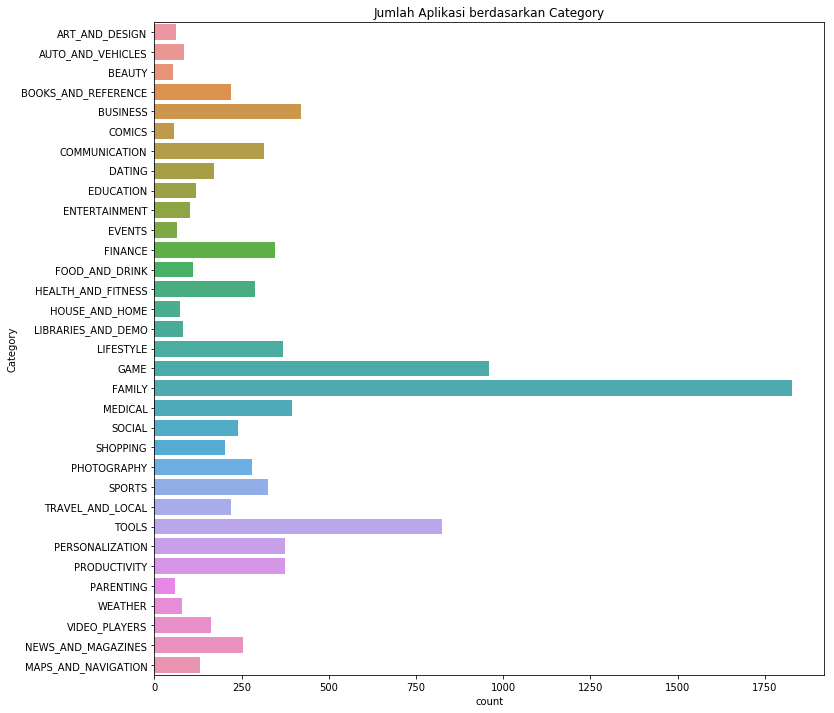

In [30]:
# melihat Jumlah Aplikasi tiap Category dengan menggunakan Barplot
plt.figure(figsize=(12,12))
sns.countplot(y='Category',data = dfGapps)
plt.title("Jumlah Aplikasi berdasarkan Category")

Dapat dilihat gambaran dari Jumlah Aplikasi dari setiap Category dan jumlah aplikasi dari Category Family, Game, dan Tools sangatlah jauh lebih banyak dibandingkan dengan Category lainnya. 

## Mencari Category Top Rated dengan aplikasi terbanyak

In [31]:
# Membuat dataset baru dengan nama dfTopR
dfTopR = dfGapps.filter(['Category','Rating'], axis=1)

In [32]:
# Melakukan metode groupby pada Category
# untuk mendapatkan min & max Rating, serta jumlah rating dari setiap Category
dfsumTopR = dfTopR.groupby('Category').agg({"Rating": [min, max,"count"]}) 
dfsumTopR.columns = ["_".join(x) for x in dfsumTopR.columns.ravel()]

# Melakukan sort data 
# Untuk mendapatkan Category Top Rated dengan jumlah Rating Terbanyak
dfsumTopR = dfsumTopR.sort_values(['Rating_max','Rating_count'],ascending=False)
dfsumTopR = dfsumTopR.reset_index()
dfsumTopR.head()

,Category,Rating_min,Rating_max,Rating_count
0,FAMILY,1.0,5.0,1828
1,GAME,1.0,5.0,959
2,TOOLS,1.0,5.0,825
3,BUSINESS,1.0,5.0,420
4,MEDICAL,1.0,5.0,395


In [33]:
# Membuat Tampungan untuk total aplikasi setiap Category
count = dfGapps.Category.value_counts() 
count

# Mencari top Category yang memiliki jumlah Rating terbanyak
print("Aplikasi Terpopuler")
top_apps = count.nlargest().head()
top_apps

Aplikasi Terpopuler


FAMILY      1828
GAME         959
TOOLS        825
BUSINESS     420
MEDICAL      395
Name: Category, dtype: int64

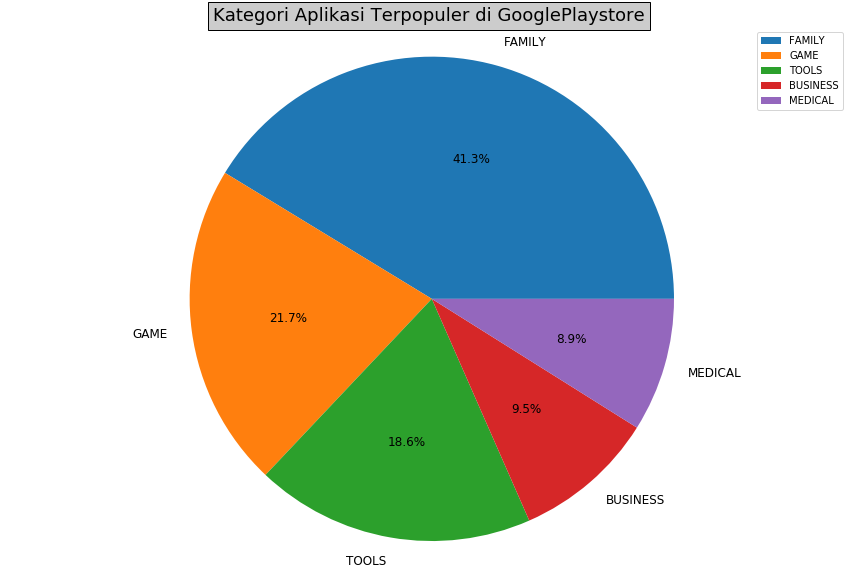

In [34]:
# Plotting Category dari Aplikasi Terpopuler.

labels = top_apps.index.values
num_apps = top_apps.values

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.pie(num_apps, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 12})

ax1.axis('equal')  # Equal aspect ratio untuk memastikan Pie Chart berbentuk lingkaran.
# legend
ax1.legend(loc="best")

plt.title("Kategori Aplikasi Terpopuler di GooglePlaystore", bbox={'facecolor':'0.8', 'pad':5}, fontsize="18")
plt.show()

## 2.A Distribusi Rating di Setiap Category

Text(0.5, 1.0, 'Distribusi Rating Seluruh App')

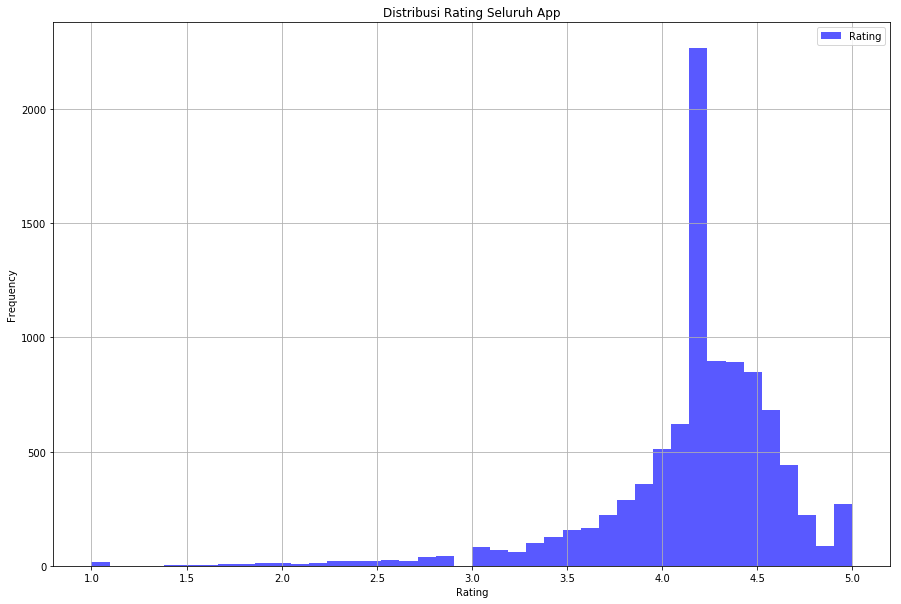

In [35]:
# Histogram keseluruhan Distribusi Rating 
dfGapps["Rating"].plot(kind="hist",color="blue",bins=42,grid=True,alpha=0.65,label="Rating",figsize=(15,10))
plt.legend()
plt.xlabel("Rating")
plt.title("Distribusi Rating Seluruh App")

Dapat Dilihat bahwa Rating rata-rata Rating Aplikasi di GooglePlaystore berada diangka 4.0- 4.5

Text(0.5, 1.0, 'Boxplot Distribusi Rating Setiap Category')

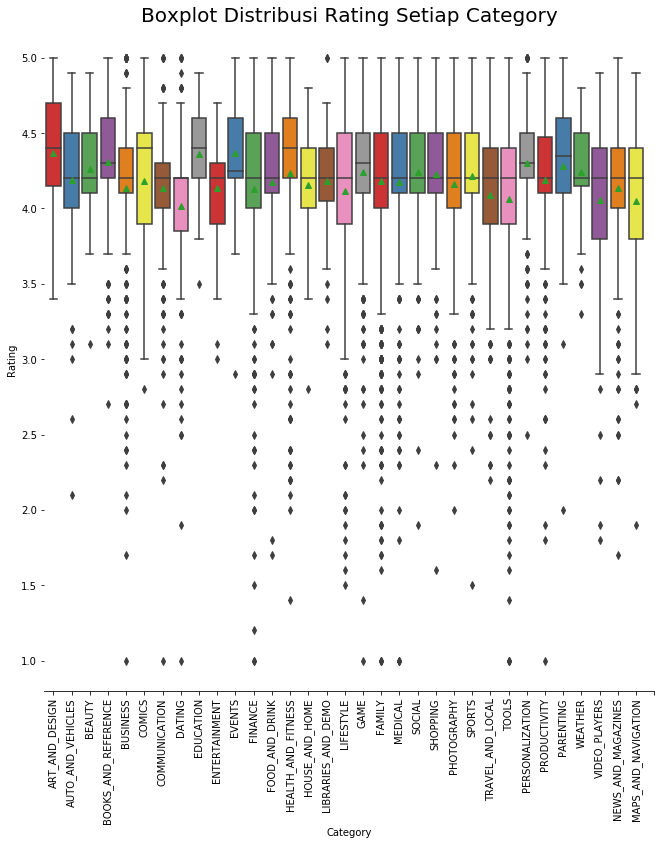

In [36]:
bxRatvsCat = sns.catplot(x="Category",y="Rating",data=dfGapps, kind="box", height = 10 ,
palette = "Set1", showmeans = True)
bxRatvsCat.despine(left=True)
bxRatvsCat.set_xticklabels(rotation=90)
bxRatvsCat.set( xticks=range(0,34))
bxRatvsCat = bxRatvsCat.set_ylabels("Rating")
plt.title('Boxplot Distribusi Rating Setiap Category',size = 20)

Dapat dilihat bahwa distribusi Rating dari setiap Category tidaklah jauh berbeda dan berada di angka 4.0

## 3.A Mencari Type Aplikasi yang paling sering digunakan User 

In [37]:
# Berapa banyak Aplikasi Free & Paid Dalam GooglePlaystore
type_count = dfGapps.groupby('Type').App.count()
type_count

Type
Free    8895
Paid     753
Name: App, dtype: int64

In [38]:
# Peresentase perbandingan terhadap Free vs Paid App : 
app_type = dfGapps['Type'].value_counts(normalize=True) * 100
app_type

Free    92.195274
Paid     7.804726
Name: Type, dtype: float64

Data Presentase Perbandingan Free vs Paid App dapat divisualisasikan dengan menggunakan BarChart seperti berikut :

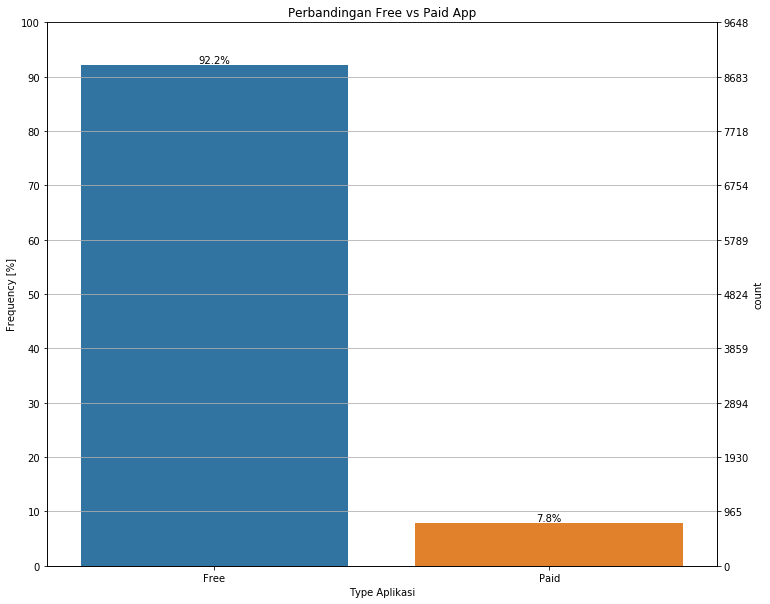

In [39]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x='Type',data = dfGapps, order=['Free','Paid'])
plt.title("Perbandingan Free vs Paid App")
plt.xlabel('Type Aplikasi')

# Membuat variable ncount untuk panjan data dfGapps
ncount = len(dfGapps)

# Membuat twin Axis
ax2 = ax.twinx()

# Menukar Posisi count axis dan frequency
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Menukar Posisi label dari count dan frequency
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

# Menggunakan LinearLocator untuk memastikan jarak tiap tick benar    
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Mengubah range frequensi menjadi 0 - 100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# menggunakan multipicator untuk memastikan jarak tiap tick adalah 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Mematikan grid pada ax2 agar gridline dapat terlihat
ax2.grid(None)

Dapat divisualiasi juga total dari Free & Paid App disetiap Category dengan menggunakan BarChart :

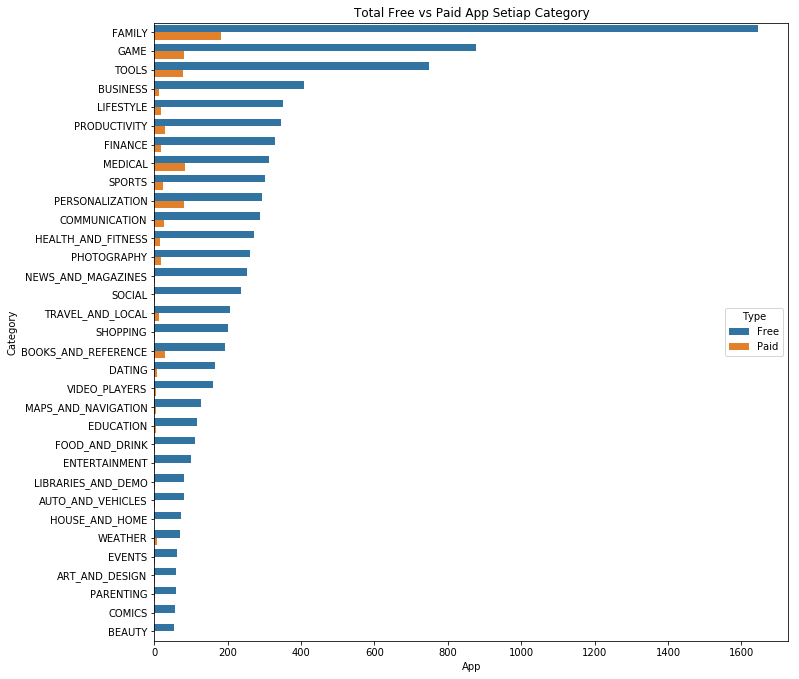

In [40]:
# Barchart total dari Free and Paid app berdasarkan Kategori.

BcFvP = dfGapps.groupby(['Category','Type']).count()[['App']].reset_index().sort_values(by="App",ascending = False)
plt.figure(figsize=(25,25))
ax=plt.subplot(221)
plt.title("Total Free vs Paid App Setiap Category") 
a =sns.catplot(x="App", y="Category",kind="bar", hue="Type", ax=ax,data=BcFvP)
plt.close(2)

## 4.A Hubungan Rating dengan Reviews

In [41]:
# Membuat dataset baru dengan nama dfCorrRR
dfCorrRR = dfGapps.filter(['Rating','Reviews'], axis=1)

dfCorrRR = dfGapps
dfCorrRR.drop(['App','Category', 'Size', 'SizeC','Installs','InstallsC',
                'Type','Price','PriceC','Content Rating','Genres',
                'Last Updated','Current Ver','Android Ver'],axis = 1) 

In [42]:
# Melakukan metode groupby 
# untuk mendapatkan total Reviews di setiap Rating
dfsumCorrRR = dfCorrRR.groupby(['Rating']).sum()
dfsumCorrRR = dfsumCorrRR.reset_index()

In [43]:
# Menampilkan hasil dari hasil groupby 
dfsumCorrRR.head()

,Rating,Reviews
0,1.0,28.0
1,1.2,44.0
2,1.4,98.0
3,1.5,61.0
4,1.6,691.0


In [44]:
# Membuat tampungan baru untuk masing-masing kolom
colReviews = dfsumCorrRR['Reviews']
colRatings = dfsumCorrRR['Rating']

In [45]:
# Menggunakan metode pearson untuk mendapatkan korelasi dari Rating dengan Reviews
pearsonr_coefficient, p_value = pearsonr(colReviews,colRatings)
print ('PearsonR Correlation Coeficient dari Reviews dengan Rating :') 
pearsonr_coefficient

PearsonR Correlation Coeficient dari Reviews dengan Rating :


0.5129394135185708

Hasil dari Pearson Correlation Coeficient lebih dari 0, 
hal itu menunjukan bahwa terdapat hubungan yang positif antara Rating dengan Reviews. 

In [46]:
# Membuat plot untuk Reggresion Line
slope, intercept, r, p, stderr = scipy.stats.linregress(colReviews, colRatings)

In [47]:
# Membuat string dengan equation dari regression line
line = f'Regression line: colRatings={intercept:.2f}+{slope:.2f}colReviews, r={r:.2f}'
line

'Regression line: colRatings=2.83+0.00colReviews, r=0.51'

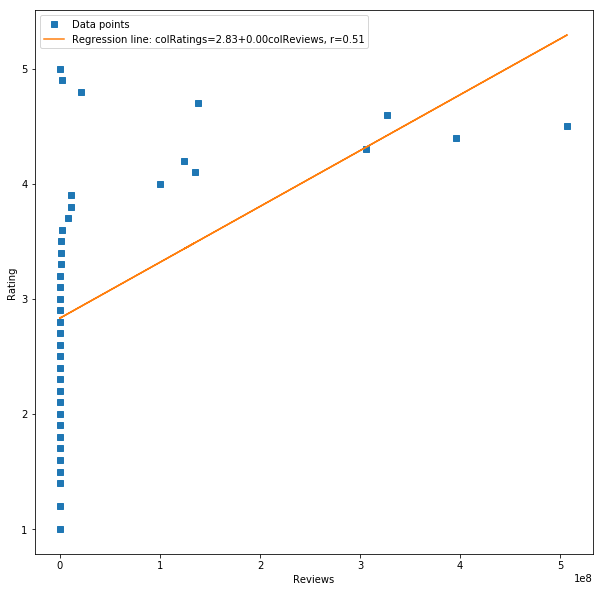

In [48]:
# Membuat Visualisasi dari regression line Rating dengan Reviews
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(colReviews, colRatings, linewidth=0, marker='s', label='Data points')
ax.plot(colReviews, intercept + slope * colReviews, label=line)
ax.set_xlabel('Reviews')
ax.set_ylabel('Rating')
ax.legend(facecolor='white')
plt.show()

## 5.A Hubungan Rating dengan Installs

In [49]:
# Membuat dataset baru dengan nama dfCorrRI
dfCorrRI = dfGapps.filter(['Rating','InstallsC'], axis=1)

In [50]:
# Melakukan metode groupby 
# untuk mendapatkan nilai Installs dan Rating yang sudah terkelompokan
dfsumCorrRI = dfCorrRI.groupby(['Rating','InstallsC']).count()
dfsumCorrRI = dfsumCorrRI.reset_index()

In [51]:
# Menampilkan hasil dari hasil groupby 
dfsumCorrRI.head()

,Rating,InstallsC
0,1.0,10
1,1.0,50
2,1.0,100
3,1.0,500
4,1.0,1000


Data Installs yang sudah dikonversikan menjadi kolom InstallsC berbentuk seperti Milestone yang menggambarkan titik capaian unduh dari setiap aplikasi. dan untuk mempermudah dalam membandingkan Hubungan Rating dengan Installs maka tiap poin capaian akan di urutkan dan di encode dari terkecil ke terbesar. contoh :
* 0 = 1+
* 1 = 5+
* 2 = 10+
* 3 = 50+
* .
* .
* .
* 18 = 1.000.000.000+

In [52]:
# mengurutkan Milestone Install Terkecil ke Terbesar
SV_InstallsC = sorted(list(dfsumCorrRI['InstallsC'].unique()))

In [53]:
# Mengkonversikan kolom InstallsC sesuai Encode yang sudah ditetapkan
dfsumCorrRI['InstallsC'].replace(SV_InstallsC,range(0,len(SV_InstallsC),1), inplace = True )

In [54]:
# Menampilkan hasil dari penyesuaian kolom InstallsC
dfsumCorrRI.head()

,Rating,InstallsC
0,1.0,3
1,1.0,4
2,1.0,5
3,1.0,6
4,1.0,7


In [55]:
# Membuat tampungan baru untuk masing-masing kolom
colInstalls = dfsumCorrRI['InstallsC']
colRating = dfsumCorrRI['Rating']

In [56]:
# Menggunakan metode pearson untuk mendapatkan korelasi dari Rating dengan Installs
pearsonr_coefficient, p_value = pearsonr(colInstalls,colRating)
print ('PearsonR Correlation Coeficient :') 
pearsonr_coefficient

PearsonR Correlation Coeficient :


0.2119962247045179

Hasil dari Pearson Correlation Coeficient lebih dari 0, 
hal itu menunjukan bahwa terdapat hubungan yang positif antara Rating dengan Installs. 

In [57]:
# Membuat plot untuk Reggresion Line
slope, intercept, r, p, stderr = scipy.stats.linregress(colInstalls, colRating)

In [58]:
# Membuat string dengan equation dari regression line
line = f'Regression line: colRating={intercept:.2f}+{slope:.2f}colInstalls, r={r:.2f}'
line

'Regression line: colRating=3.08+0.05colInstalls, r=0.21'

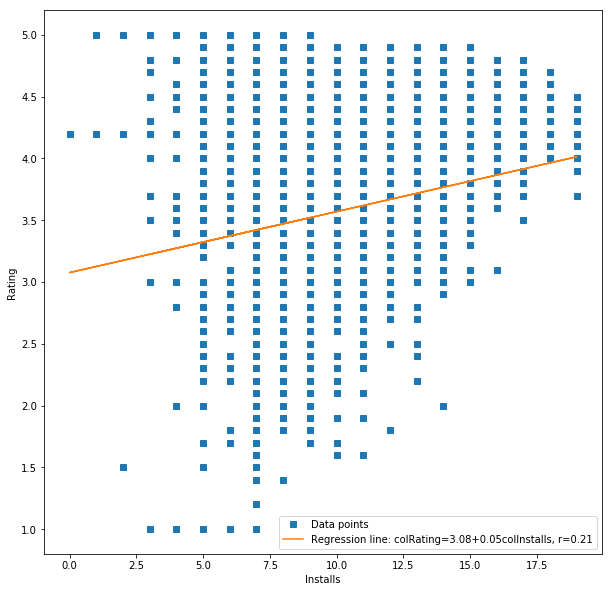

In [59]:
# Membuat Visualisasi dari regression line Rating dengan Installs
fig, ax = plt.subplots(figsize=(10,10)) 
ax.plot(colInstalls, colRating, linewidth=0, marker='s', label='Data points')
ax.plot(colInstalls, intercept + slope * colInstalls, label=line)
ax.set_xlabel('Installs')
ax.set_ylabel('Rating')
ax.legend(facecolor='white')
plt.show()